### split_on_morphology
- this script finds the trends of $\lambda_R$ vs $M_{halo}$ for quartiles of $M_{stel} / M_{halo}$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

In [15]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/split_on_mstel_mhalo_ratio/'

# initiating catalog class objects.
total = catalog.Catalog(basepath)

# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath)
total.remove_satellites()

# creating copies of these objects and cutting on morphology.
ltgs = copy.deepcopy(total) 
ltgs.select_morphology('ltg')

etgs = copy.deepcopy(total) 
etgs.select_morphology('etg')

unclassified = copy.deepcopy(total)
unclassified.select_morphology('unclassified')

/Users/chrisduckworth/astronomy/projects/spin_bias/scripts/catalog_init.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['stellar_to_halo_ratio'] = np.log10(tab.nsa_elpetro_mass.values) -  tab.halo_mass_stel.values


/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


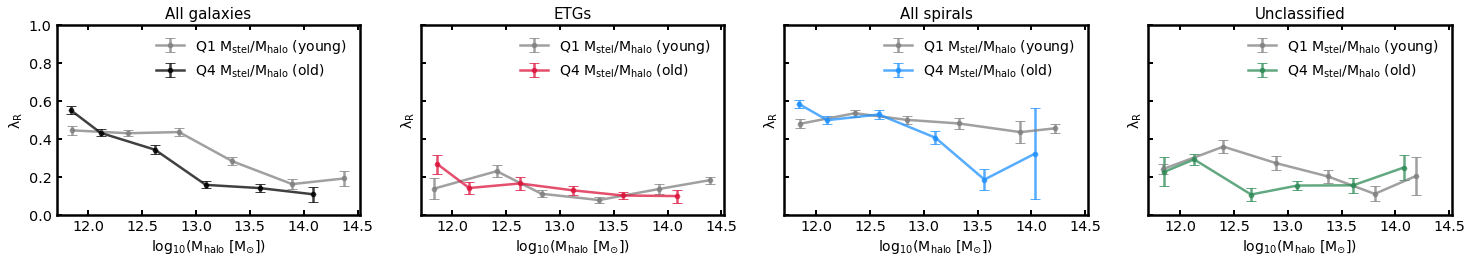

In [16]:
x_bins = np.array([12, 12.5, 13, 13.5, 14]) 
z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Q1 $\mathrm{M_{stel}/M_{halo}\; (young)}$', 'Q2 $\mathrm{M_{stel}/M_{halo}}$', 'Q3 $\mathrm{M_{stel}/M_{halo}}$', 'Q4 $\mathrm{M_{stel}/M_{halo} \; (old)}$']

fig, ax = plt.subplots(1,4, figsize=(25, 3.5), sharex='all', sharey='all')
total.plot_binned_percentiles_three_props("halo_mass_stel", "lambda_re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, ax[0], colors=['grey', 'dimgray', 'rosybrown', 'k'], extrema=True)
etgs.plot_binned_percentiles_three_props("halo_mass_stel", "lambda_re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, ax[1], colors=['grey', 'k', 'orange', 'crimson'], extrema=True)
ltgs.plot_binned_percentiles_three_props("halo_mass_stel", "lambda_re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, ax[2], colors=['grey', 'k', 'lightblue', 'dodgerblue'], extrema=True)
unclassified.plot_binned_percentiles_three_props("halo_mass_stel", "lambda_re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, ax[3], colors=['grey', 'k', 'green', 'seagreen'], extrema=True)

titles = ['All galaxies', 'ETGs', 'All spirals', 'Unclassified']

for ind, axis in enumerate(ax):
    axis.set_ylabel("$\mathrm{\lambda_R}$", fontsize=14)
    axis.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=14)
    axis.set_title(titles[ind], fontsize=15)
    axis.legend(frameon=False, fontsize=14)

ax[0].set_ylim([0,1])
plt.savefig(outpath+'lambdaR_mhalo-mstel_mhalo-split.pdf', format='pdf', bbox_inches='tight')
